In [1250]:
# Customer Churn Prediction using Machine Learning

# ## Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectKBest
from collections import Counter
from imblearn.combine import SMOTEENN
plt.style.use('default')
import warnings
warnings.filterwarnings("ignore")
import joblib

import warnings
warnings.filterwarnings('ignore')


In [1252]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
import numpy as np

In [1254]:
# ## Loading the Dataset
df = pd.read_csv('customerchurn.csv')
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [1256]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [1258]:
df.shape

(7043, 21)

In [1260]:
pd.set_option("display.max_columns", None)

In [1262]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [1264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [1266]:
# dropping customerID column as this is not required for modelling
df = df.drop(columns=["customerID"])

In [1268]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [1270]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [1272]:
print(df["gender"].unique())

['Female' 'Male']


In [1274]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [1276]:
print(df["SeniorCitizen"].unique())

[0 1]


In [1278]:
# printing the unique values in all the columns

numerical_features_list = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [1280]:
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [1282]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [1284]:
len(df[df["TotalCharges"]==" "])

11

In [1286]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [1288]:
#df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"})

In [1290]:
#df["TotalCharges"] = df["TotalCharges"].astype(float)

In [1292]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [1295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [1297]:
# checking the class distribution of target column
print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


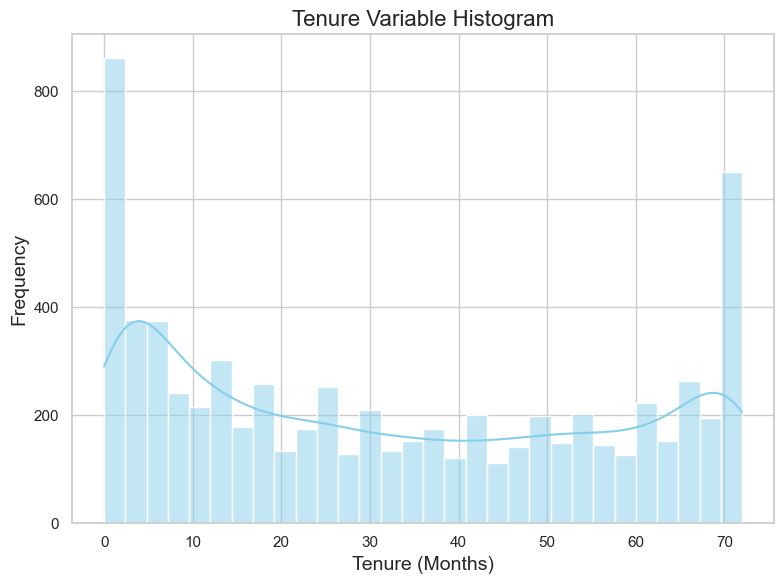

In [1299]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is loaded as 'df'
# df = pd.read_csv('your_dataset.csv')

# Set the style for the plots
sns.set(style="whitegrid")

# 1. Tenure Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['tenure'], bins=30, kde=True, color='skyblue')
plt.title('Tenure Variable Histogram', fontsize=16)
plt.xlabel('Tenure (Months)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()

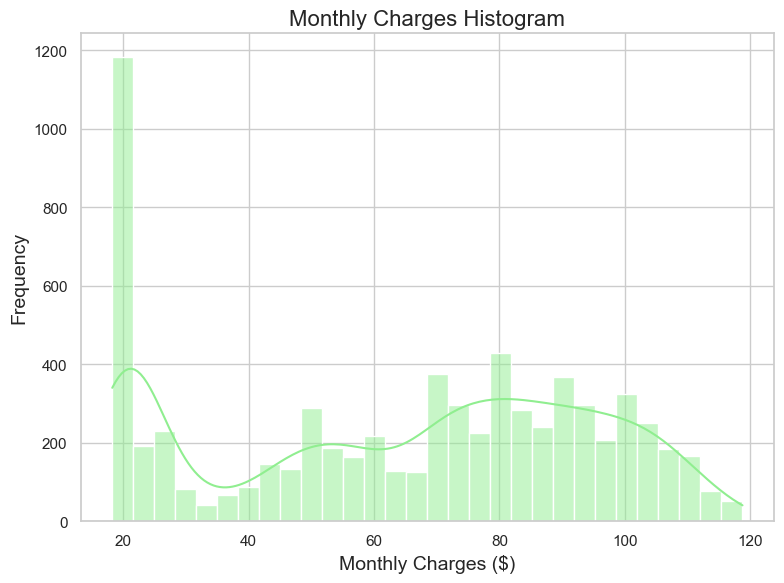

In [1300]:

# 2. Monthly Charges Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='lightgreen')
plt.title('Monthly Charges Histogram', fontsize=16)
plt.xlabel('Monthly Charges ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()

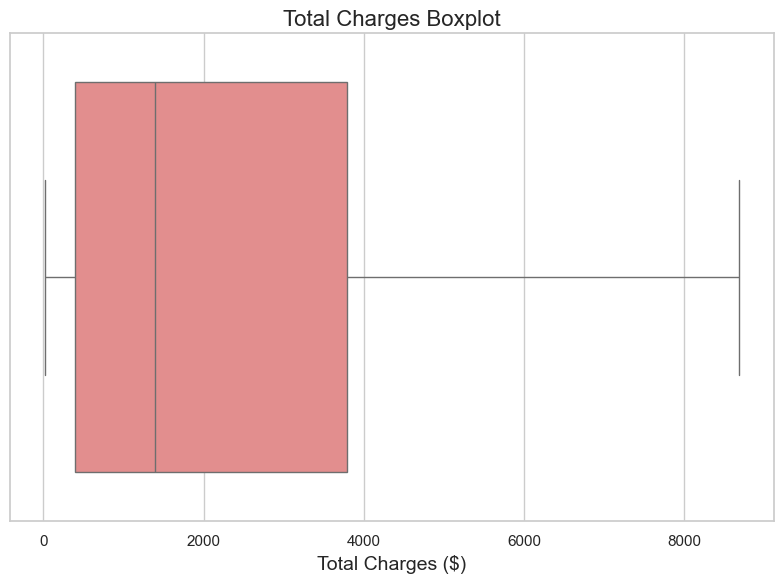

In [1301]:
# 3. Total Charges Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['TotalCharges'], color='lightcoral')
plt.title('Total Charges Boxplot', fontsize=16)
plt.xlabel('Total Charges ($)', fontsize=14)
plt.tight_layout()
plt.show()

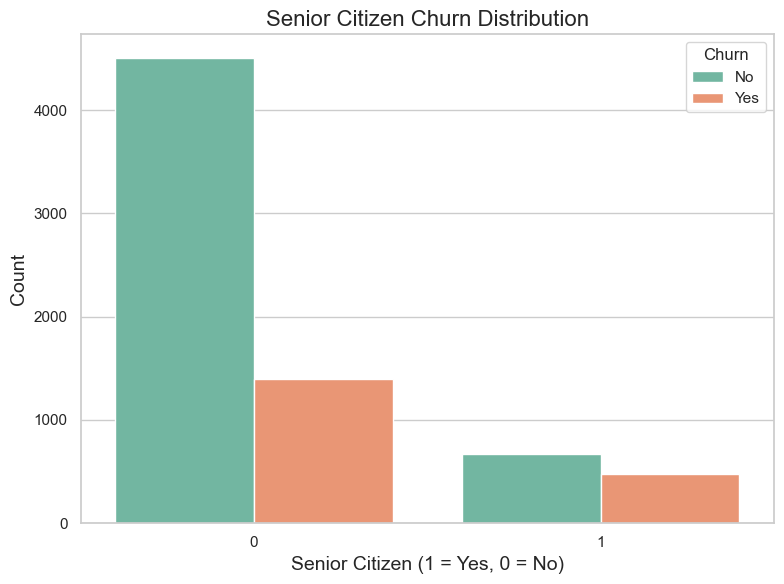

In [1302]:
# 4. Senior Citizen vs Churn Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette='Set2')
plt.title('Senior Citizen Churn Distribution', fontsize=16)
plt.xlabel('Senior Citizen (1 = Yes, 0 = No)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

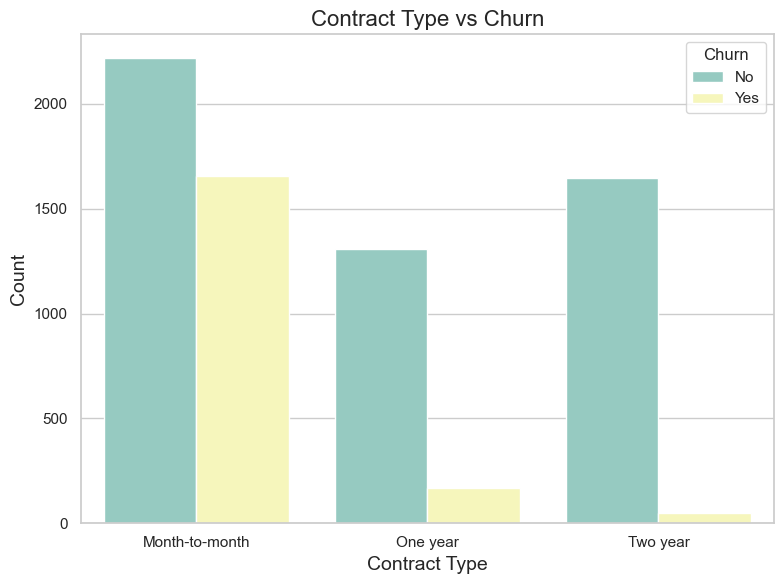

In [1303]:

# 5. Contract Type vs Churn Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set3')
plt.title('Contract Type vs Churn', fontsize=16)
plt.xlabel('Contract Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

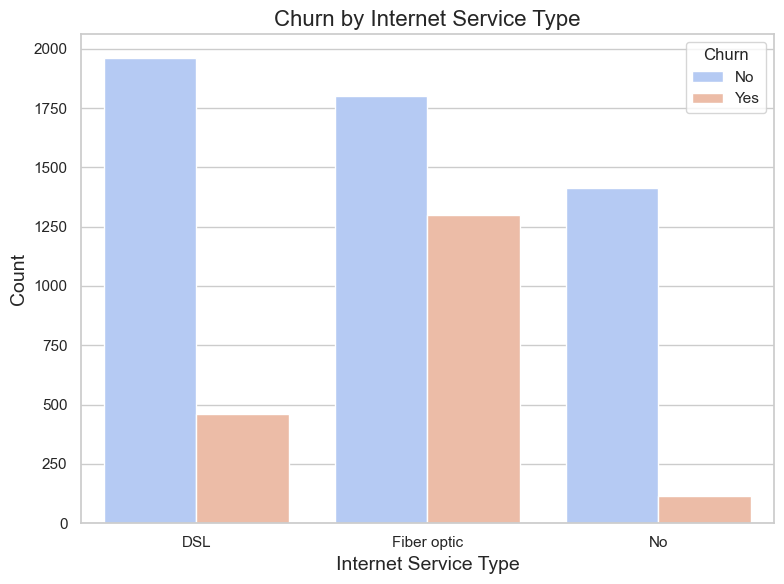

In [1304]:

# 6. Internet Service Type vs Churn Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', hue='Churn', data=df, palette='coolwarm')
plt.title('Churn by Internet Service Type', fontsize=16)
plt.xlabel('Internet Service Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

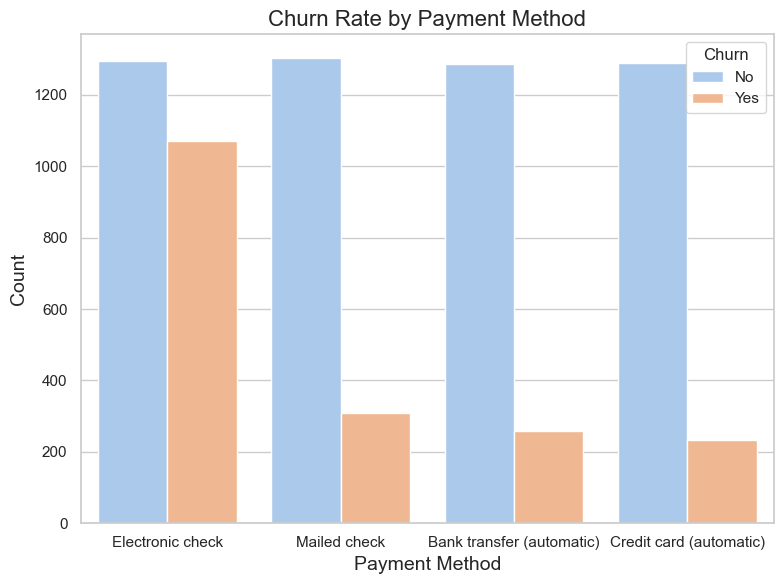

In [1306]:

# 7. Payment Method vs Churn Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='pastel')
plt.title('Churn Rate by Payment Method', fontsize=16)
plt.xlabel('Payment Method', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

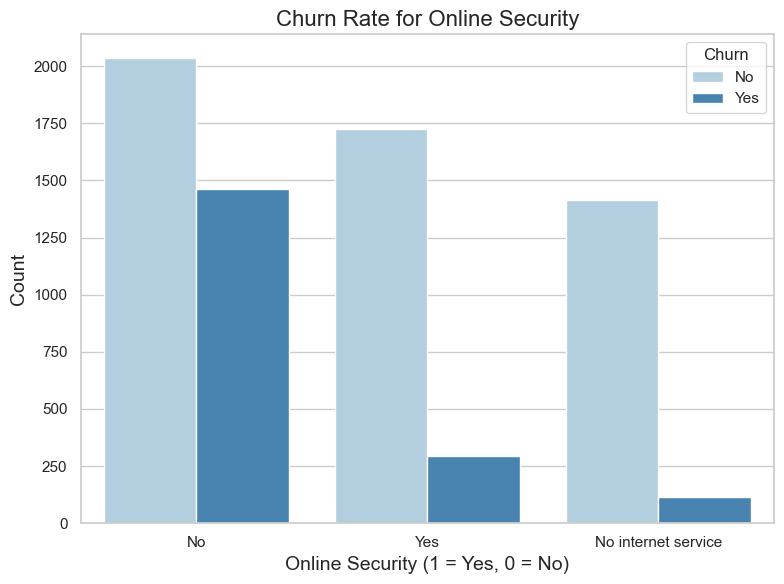

In [1307]:
# 8. Churn Rate for Online Security Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(x='OnlineSecurity', hue='Churn', data=df, palette='Blues')
plt.title('Churn Rate for Online Security', fontsize=16)
plt.xlabel('Online Security (1 = Yes, 0 = No)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

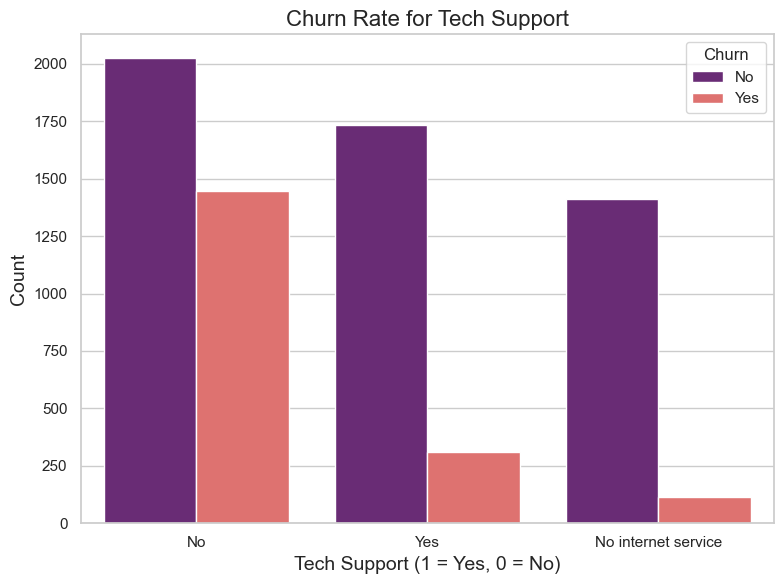

In [1308]:
# 9. Churn Rate for Tech Support Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(x='TechSupport', hue='Churn', data=df, palette='magma')
plt.title('Churn Rate for Tech Support', fontsize=16)
plt.xlabel('Tech Support (1 = Yes, 0 = No)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

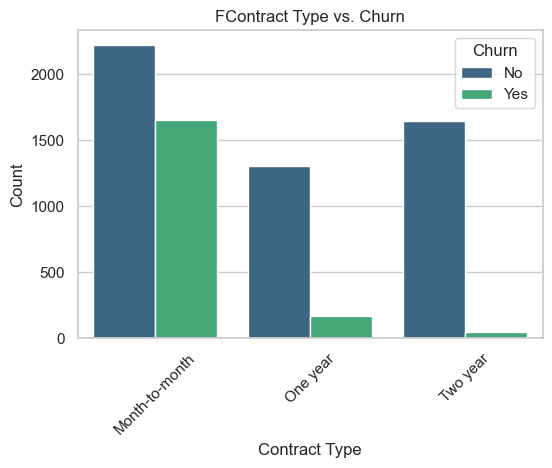

In [1310]:

# Contract Type vs Churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Contract', hue='Churn', data=df, palette='viridis')
plt.title('FContract Type vs. Churn')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


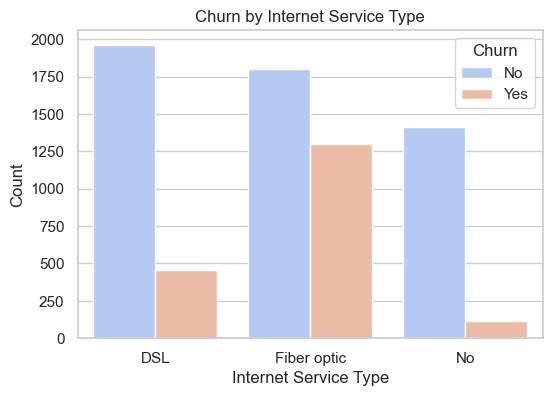

In [1311]:
# Churn by Internet Service Type
plt.figure(figsize=(6, 4))
sns.countplot(x='InternetService', hue='Churn', data=df, palette='coolwarm')
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

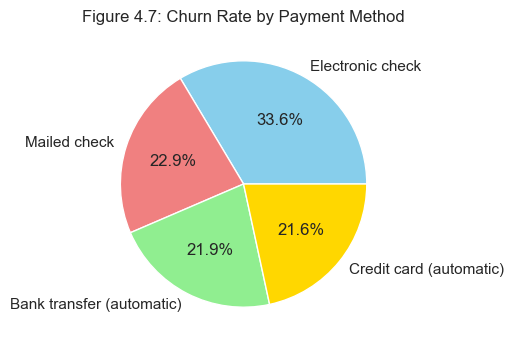

In [1313]:
# Churn Rate by Payment Method
plt.figure(figsize=(6, 4))
df['PaymentMethod'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Figure 4.7: Churn Rate by Payment Method')
plt.ylabel('')
plt.show()


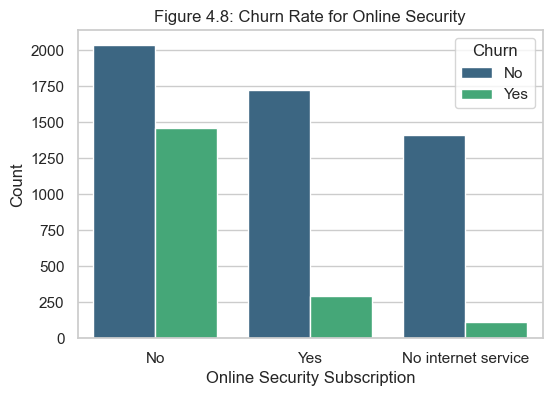

In [1315]:
# Churn Rate for Online Security & Tech Support
plt.figure(figsize=(6, 4))
sns.countplot(x='OnlineSecurity', hue='Churn', data=df, palette='viridis')
plt.title('Figure 4.8: Churn Rate for Online Security')
plt.xlabel('Online Security Subscription')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


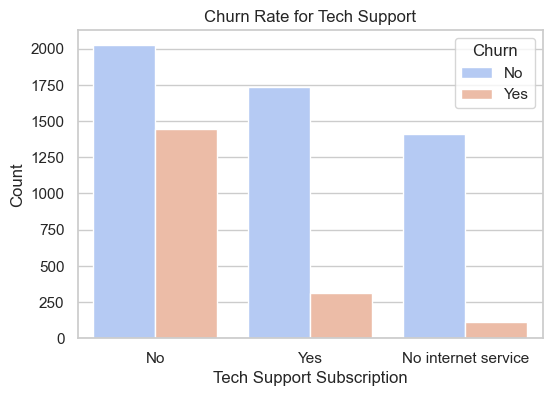

In [1316]:
plt.figure(figsize=(6, 4))
sns.countplot(x='TechSupport', hue='Churn', data=df, palette='coolwarm')
plt.title('Churn Rate for Tech Support')
plt.xlabel('Tech Support Subscription')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

In [1317]:
def plot_histogram(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()

  plt.show()

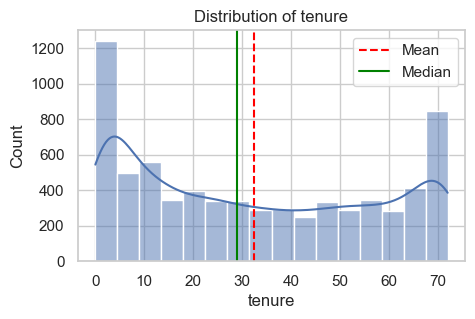

In [1319]:
plot_histogram(df, "tenure")

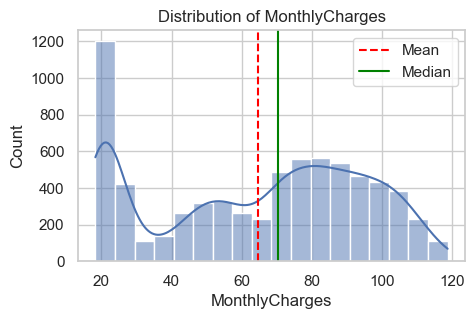

In [1320]:
plot_histogram(df, "MonthlyCharges")

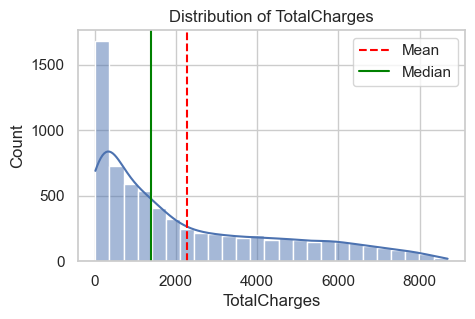

In [1322]:
plot_histogram(df, "TotalCharges")

In [1323]:
def plot_boxplot(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Box Plot of {column_name}")
  plt.ylabel(column_name)
  plt.show

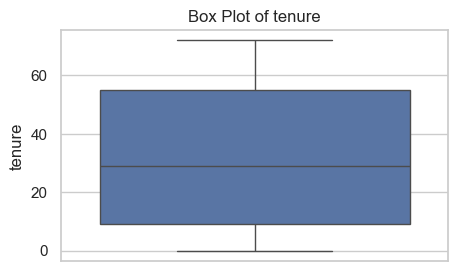

In [1325]:
plot_boxplot(df, "tenure")

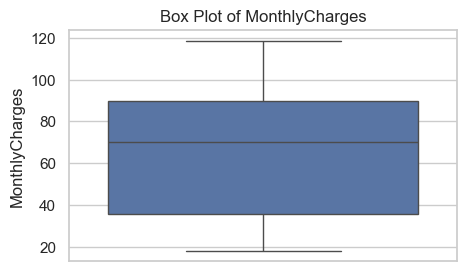

In [1326]:
plot_boxplot(df, "MonthlyCharges")

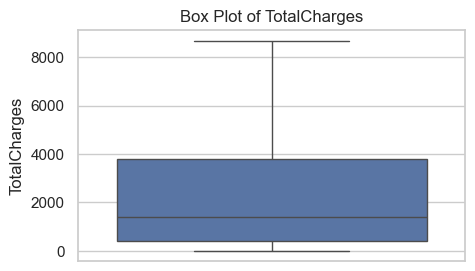

In [1328]:
plot_boxplot(df, "TotalCharges")

## Insights:
### 1. Customer ID removed as it is not required for modelling
### 2. No missing values in the dataset
### 3. Missing values in the TotalCharges column were replaced with 0
### 4. Class imbalance identified in the target

In [1335]:
#perentage of each class sample distribution
print("Customer Churn : {}%".format(np.round((len(df[df["Churn"]=="Yes"])/len(df)*100),decimals=2)))
print("Customer Not Churn : {}%".format(np.round((len(df[df["Churn"]=="No"])/len(df)*100),decimals=2)))

Customer Churn : 26.54%
Customer Not Churn : 73.46%


In [1337]:
#how much loss we are having because of customer churn
churn_customers=df[df["Churn"]=="Yes"]
loss=churn_customers["TotalCharges"].sum()
total_revenue=df["TotalCharges"].sum()
print("We have lost arround {}$ due to customer churn".format(loss))
print("We have lost arround {} percentage of revengue due to customer churn".format(np.round(loss/total_revenue*100,decimals=2)))

We have lost arround 2862926.9$ due to customer churn
We have lost arround 17.83 percentage of revengue due to customer churn


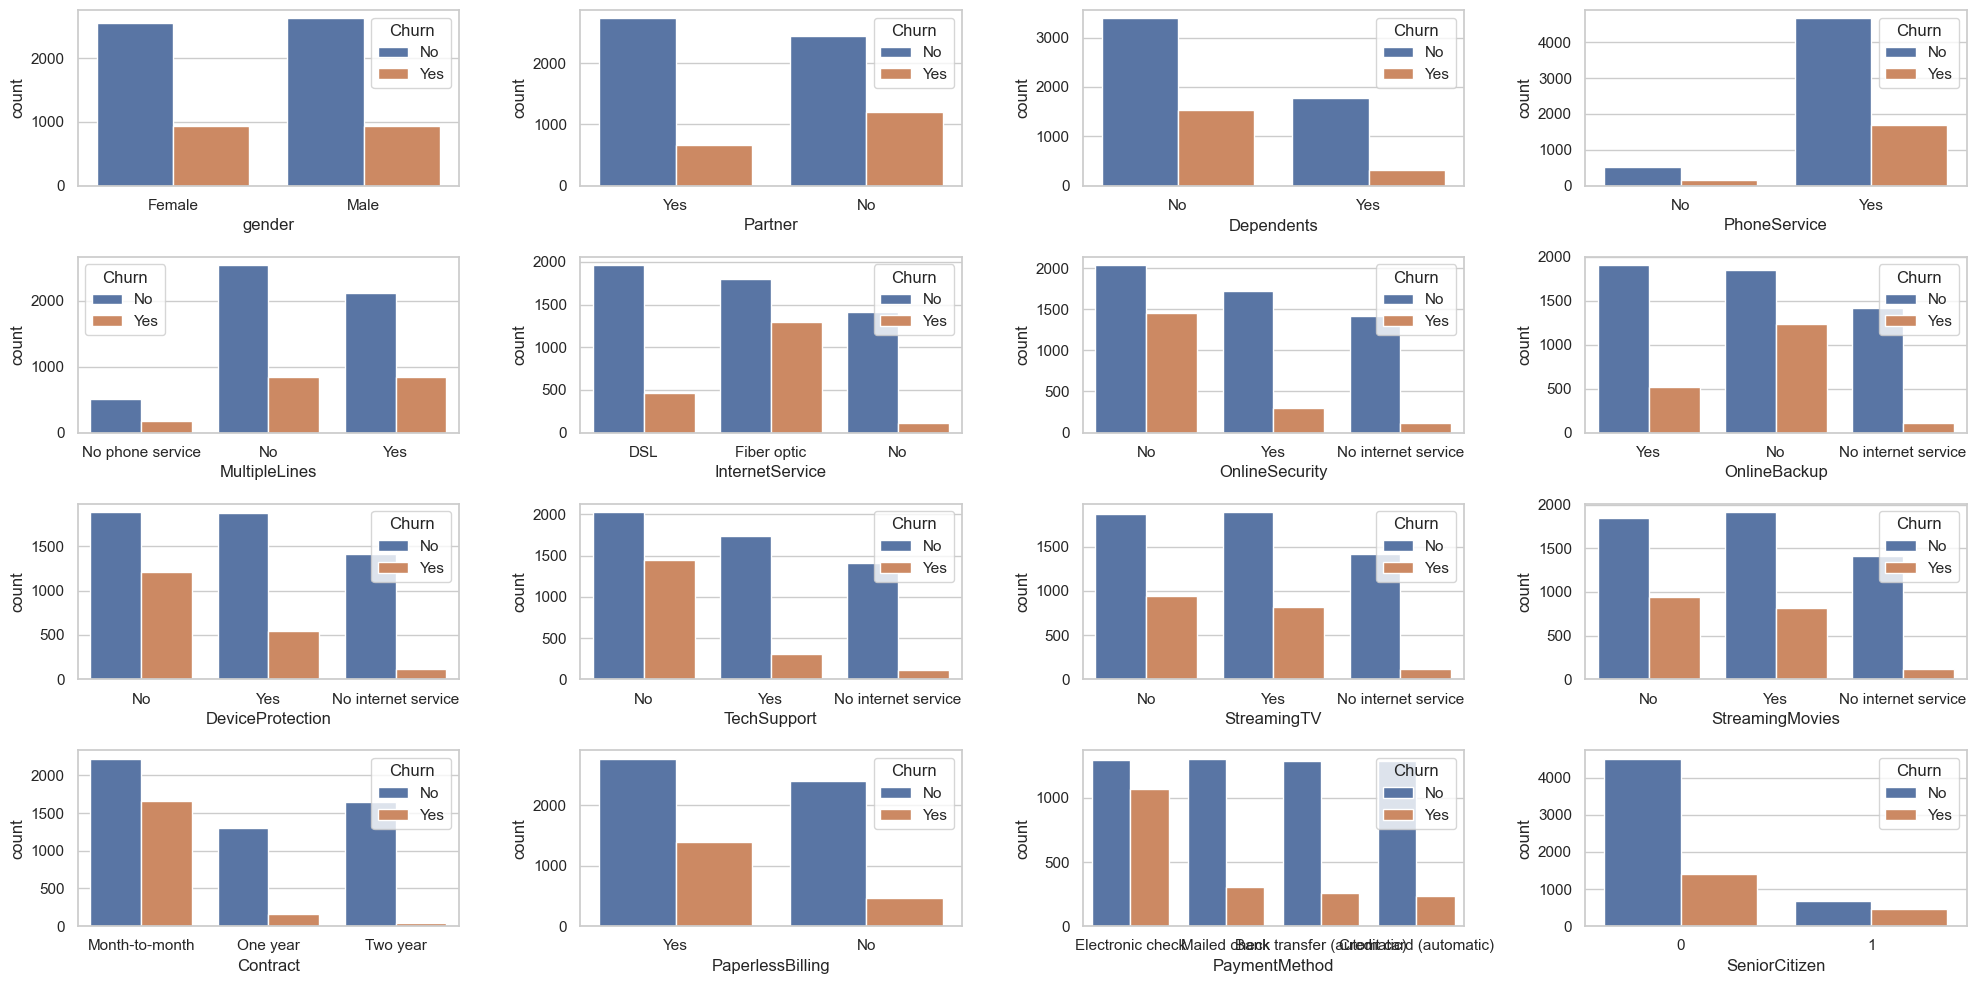

In [1339]:
#plot cateogrical features :
cat_features=list(df.select_dtypes(include='object').columns)
cat_features.remove('Churn')
cat_features.append('SeniorCitizen')

fig,axs=plt.subplots(nrows=4,ncols=4,figsize=(20,10))
axes=axs.flatten()
for i,col in enumerate(cat_features):
    sns.countplot(x=col,hue="Churn",data=df,ax=axes[i])
#adjust spacing between subplots
fig.tight_layout()
plt.show()

In [1340]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [1345]:
df["TotalCharges"].fillna(df["TotalCharges"].mean(),inplace=True)

In [1346]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [1347]:
#encoding categorical values into numeric using label encoder
encoder=LabelEncoder()
for feature in df.select_dtypes(include='object').columns:
    df[feature]=encoder.fit_transform(df[feature])

In [1349]:
# Dictionary to store encoders for each categorical column
encoders = {}

# Apply LabelEncoder to all categorical columns and store encoders
for feature in df.select_dtypes(include='object').columns:
    encoder = LabelEncoder()
    df[feature] = encoder.fit_transform(df[feature])
    encoders[feature] = encoder  # Save the encoder for later use

In [1350]:
encoder

LabelEncoder()

In [1351]:
import pickle
# save the encoders to a pickle file
with open("encoder.pkl", "wb") as f:
  pickle.dump(encoders, f)

In [1353]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [1356]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [1357]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

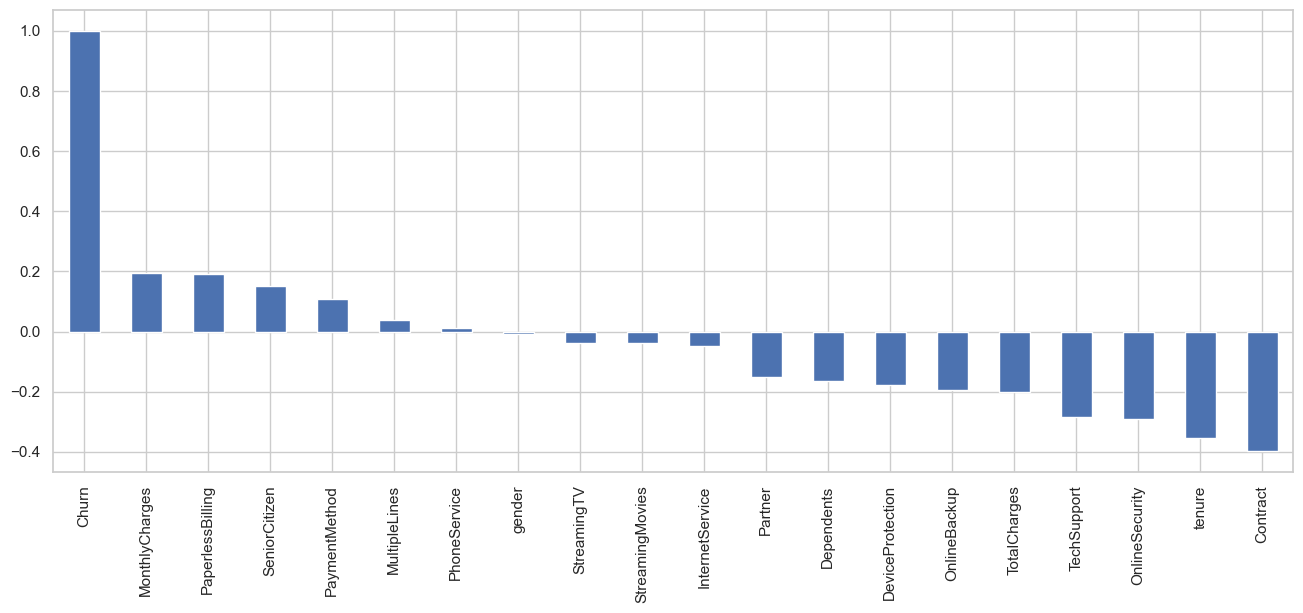

In [1361]:
#get correlation of churn with other variables
plt.figure(figsize=(16,6))
df.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")
plt.show()

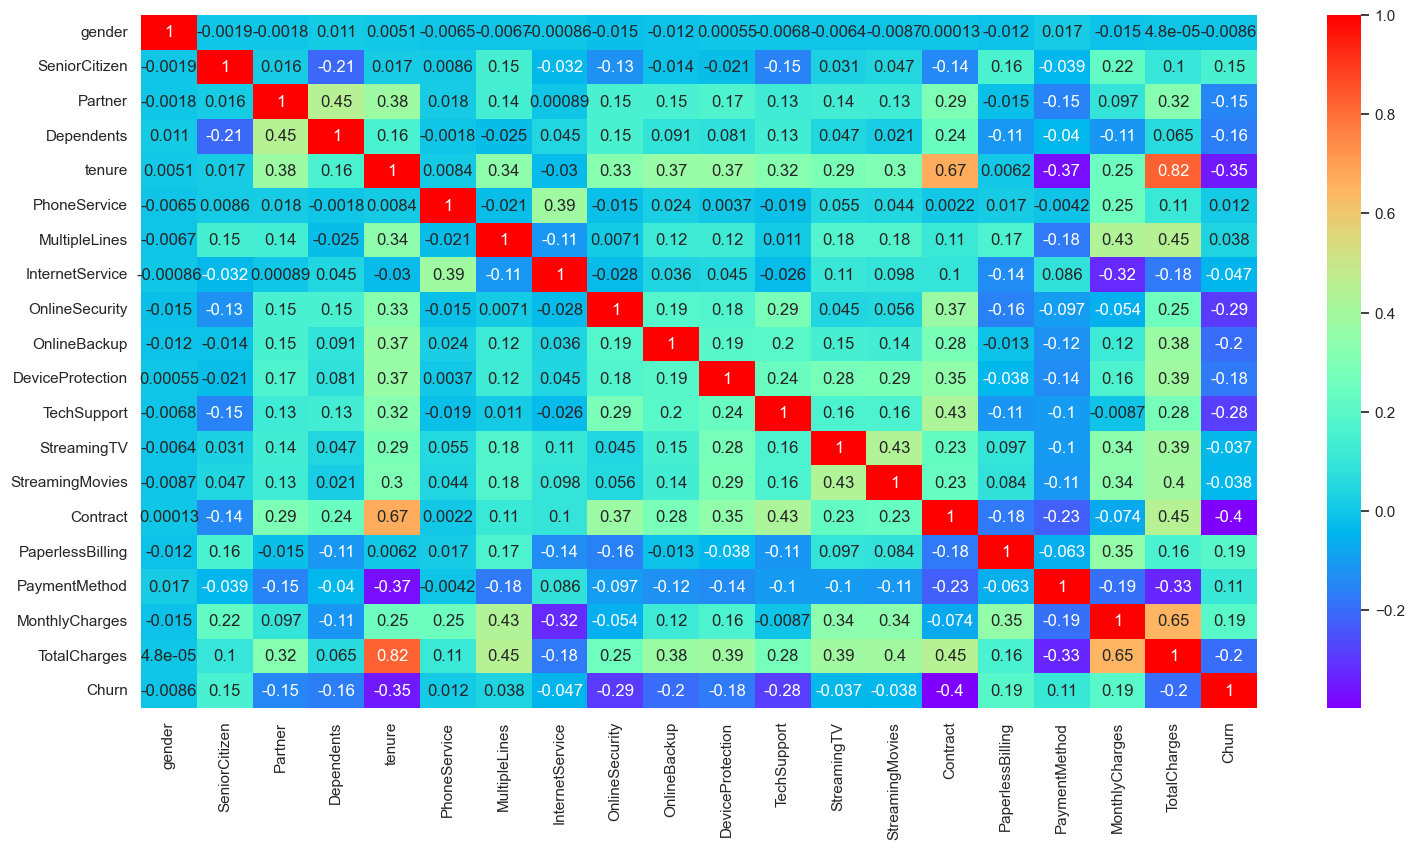

In [1364]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(),annot=True,cmap="rainbow")
plt.show()

In [1365]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


In [1602]:
#seperating independent variables and target variable
x=df.drop("Churn",axis=1)
y=df["Churn"]

In [1604]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


# Feature Selection
selecting only 10 features which has higher correlation with churn

In [1607]:
select_feature=SelectKBest(k=10) #no of features to be select
select_feature.fit(x,y)

SelectKBest()

In [1609]:
#Top 10 high correlated features
select_feature.get_feature_names_out()

array(['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges'], dtype=object)

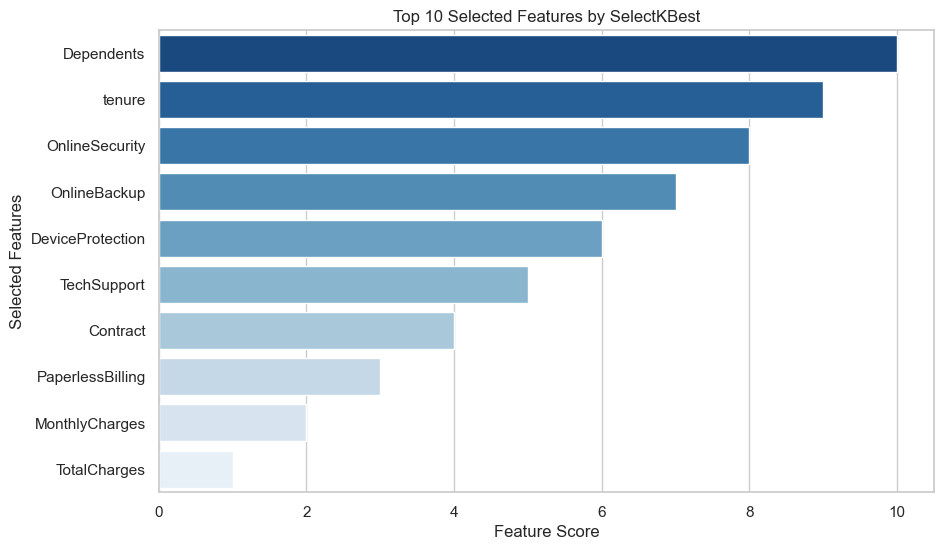

In [1611]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define selected features
selected_features = ['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
                     'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
                     'MonthlyCharges', 'TotalCharges']

# Generate some dummy importance scores (if needed, use actual scores from feature selection)
importance_scores = np.arange(len(selected_features), 0, -1)  # Example scores

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_scores, y=selected_features, palette="Blues_r")
plt.xlabel("Feature Score")
plt.ylabel("Selected Features")
plt.title("Top 10 Selected Features by SelectKBest")
plt.show()

In [1613]:
x=x[select_feature.get_feature_names_out()]

In [1615]:
x

,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,TotalCharges
0,0,1,0,2,0,0,0,1,29.85,29.85
1,0,34,2,0,2,0,1,0,56.95,1889.50
2,0,2,2,2,0,0,0,1,53.85,108.15
3,0,45,2,0,2,2,1,0,42.30,1840.75
4,0,2,0,0,0,0,0,1,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...
7038,1,24,2,0,2,2,1,1,84.80,1990.50
7039,1,72,0,2,2,0,1,1,103.20,7362.90
7040,1,11,2,0,0,0,0,1,29.60,346.45
7041,0,4,0,0,0,0,0,1,74.40,306.60


In [1617]:
x.shape

(7043, 10)

In [1619]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [1621]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((5634, 10), (5634,), (1409, 10), (1409,))

In [1623]:
#its imbalance dataset
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

# Modelling

# Logistic Regression1

In [1625]:
lr=LogisticRegression()

In [1627]:
lr.fit(x_train, y_train)

LogisticRegression()

In [1629]:
# evaluate on test data
y_pred_log = lr.predict(x_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred_log))
print('\n')
print("Confsuion Matrix: \n", confusion_matrix(y_test, y_pred_log))
print('\n')
print("Classification Report:\n \n", classification_report(y_test, y_pred_log))

Accuracy Score: 0.8133427963094393


Confsuion Matrix: 
 [[927 109]
 [154 219]]


Classification Report:
 
               precision    recall  f1-score   support

           0       0.86      0.89      0.88      1036
           1       0.67      0.59      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409



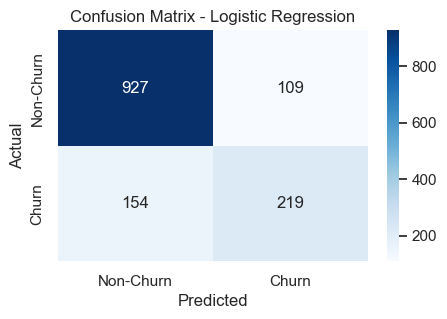

In [1631]:
# Plot the confusion matrix using seaborn
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(5, 3))
sns.heatmap(cm,annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Churn", "Churn"], yticklabels=["Non-Churn", "Churn"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# SVM

In [1638]:
svm_model = SVC(random_state=42, probability=True)

In [1640]:
# Fit the model
svm_model.fit(x_train, y_train)

SVC(probability=True, random_state=42)

In [1641]:
# Predict on the test set
y_pred_svm = svm_model.predict(x_test)

In [1644]:
# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred_svm))
print('\n')
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print('\n')
print("SVM ROC-AUC:", roc_auc_score(y_test, svm_model.predict_proba(x_test)[:, 1]))
print('\n')
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Accuracy Score: 0.7352732434350603


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      1036
           1       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409



SVM ROC-AUC: 0.8165466788120943


SVM Confusion Matrix:
 [[1036    0]
 [ 373    0]]


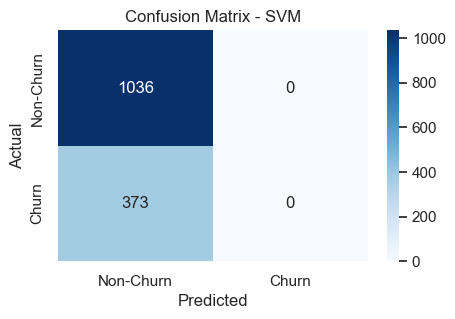

In [1646]:
# Plot the confusion matrix using seaborn
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(5, 3))
sns.heatmap(cm,annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Churn", "Churn"], yticklabels=["Non-Churn", "Churn"])
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# XGBoost

In [1648]:
xg = xgb.XGBClassifier(random_state=42)

In [1650]:
xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [1652]:
# evaluate on test data
y_pred_xg = xg.predict(x_test)

In [1654]:
print("Accuracy Score:", accuracy_score(y_test, y_pred_xg))
print('\n')
print("XGBoost Confsuion Matrix: \n", confusion_matrix(y_test, y_pred_xg))
print('\n')
print("Classification Report:\n \n", classification_report(y_test, y_pred_xg))


Accuracy Score: 0.7885024840312278


XGBoost Confsuion Matrix: 
 [[925 111]
 [187 186]]


Classification Report:
 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.63      0.50      0.56       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



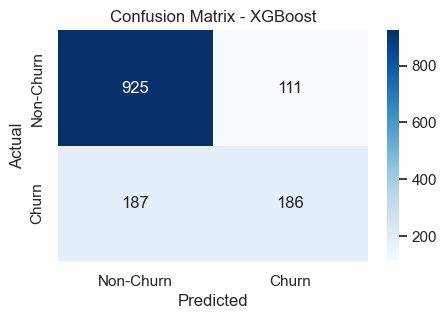

In [1656]:
# Plot the confusion matrix using seaborn
cm = confusion_matrix(y_test, y_pred_xg)
plt.figure(figsize=(5, 3))
sns.heatmap(cm,annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Churn", "Churn"], yticklabels=["Non-Churn", "Churn"])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Random Forest

In [1658]:
rfc = RandomForestClassifier(random_state=42)

In [1660]:
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [1662]:
# evaluate on test data
y_pred_rf= rfc.predict(x_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print('\n')
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_rf))
print('\n')
print("Classification Report:\n \n", classification_report(y_test, y_pred_rf))

Accuracy Score: 0.7913413768630234


Confusion Matrix: 
 [[940  96]
 [198 175]]


Classification Report:
 
               precision    recall  f1-score   support

           0       0.83      0.91      0.86      1036
           1       0.65      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [1664]:
# evaluate on test data
y_pred_rf= rfc.predict(x_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print('\n')
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_rf))
print('\n')
print("Classification Report:\n \n", classification_report(y_test, y_pred_rf))

Accuracy Score: 0.7913413768630234


Confusion Matrix: 
 [[940  96]
 [198 175]]


Classification Report:
 
               precision    recall  f1-score   support

           0       0.83      0.91      0.86      1036
           1       0.65      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



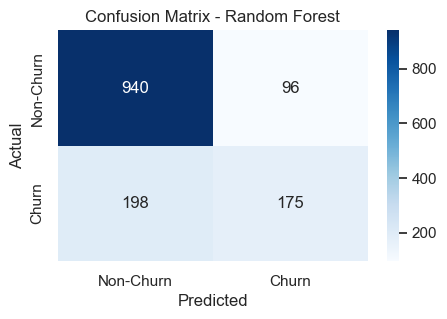

In [1670]:
# Plot the confusion matrix using seaborn
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 3))
sns.heatmap(cm,annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Churn", "Churn"], yticklabels=["Non-Churn", "Churn"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Balanced Dataset 

# Sampling 

### 1.Synthetic Minority Oversampling TEchnique (SMOTE)

In [1676]:
smote = SMOTE(random_state=42)

In [1678]:
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [1680]:
print(y_train_smote.shape)

(8276,)


In [1682]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


In [1685]:
def evaluate_model_performance(model,test_data):
    prediction=model.predict(test_data)
    #print("Training Accurary : ",model.score(x_train,y_train))
    print("Validation Accurary : {:.2f} %".format(accuracy_score(y_test,prediction)))
    print("Precision Score : {:.2f} %".format(precision_score(y_test,prediction)))
    print("Recall Score : {:.2f} %".format(recall_score(y_test,prediction)))
    print("F1 Score : {:.2f} %".format(f1_score(y_test,prediction)))
    print(classification_report(y_test,prediction))

# Logistic Regression

In [1688]:
lr = LogisticRegression(class_weight='balanced', random_state=42)

In [1690]:
lr.fit(x_train_smote, y_train_smote)

LogisticRegression(class_weight='balanced', random_state=42)

In [1692]:
#measure the performance of random forest model
evaluate_model_performance(lr,x_test)

Validation Accurary : 0.76 %
Precision Score : 0.53 %
Recall Score : 0.79 %
F1 Score : 0.63 %
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1036
           1       0.53      0.79      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409



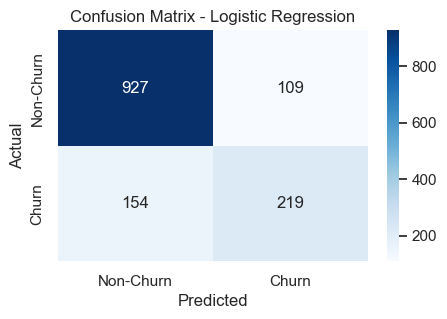

In [1694]:
# Plot the confusion matrix using seaborn
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(5, 3))
sns.heatmap(cm,annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Churn", "Churn"], yticklabels=["Non-Churn", "Churn"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# SVM

In [111]:

# Train the SVM model with default hyperparameters
svm_model = SVC(random_state=42, probability=True)

In [1697]:
# Fit the model
svm_model.fit(x_train_smote, y_train_smote)

SVC(probability=True, random_state=42)

In [1699]:
#measure the performance of random forest model
evaluate_model_performance(svm_model,x_test)

Validation Accurary : 0.69 %
Precision Score : 0.44 %
Recall Score : 0.64 %
F1 Score : 0.52 %
              precision    recall  f1-score   support

           0       0.84      0.71      0.77      1036
           1       0.44      0.64      0.52       373

    accuracy                           0.69      1409
   macro avg       0.64      0.67      0.64      1409
weighted avg       0.74      0.69      0.70      1409



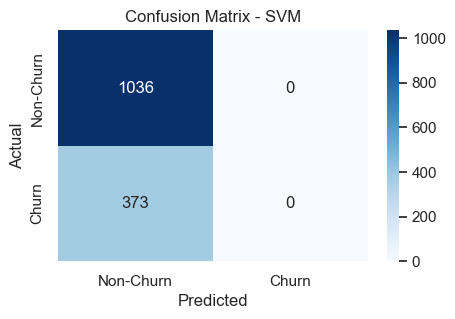

In [1701]:
# Plot the confusion matrix using seaborn
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(5, 3))
sns.heatmap(cm,annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Churn", "Churn"], yticklabels=["Non-Churn", "Churn"])
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# XGBoost

In [116]:
xg = xgb.XGBClassifier(random_state=42)

In [117]:
xg.fit(x_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [118]:
#measure the performance of random forest model
evaluate_model_performance(xg,x_test)

Validation Accurary : 0.78 %
Precision Score : 0.57 %
Recall Score : 0.63 %
F1 Score : 0.60 %
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1036
           1       0.57      0.63      0.60       373

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.78      0.78      0.78      1409



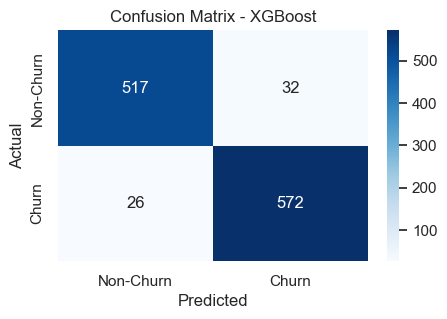

In [1233]:
# Plot the confusion matrix using seaborn
cm = confusion_matrix(y_test, y_pred_xg)
plt.figure(figsize=(5, 3))
sns.heatmap(cm,annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Churn", "Churn"], yticklabels=["Non-Churn", "Churn"])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Random Forest

In [1439]:
rfc = RandomForestClassifier(random_state=42)

In [1441]:
rfc.fit(x_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [1443]:
#measure the performance of random forest model
evaluate_model_performance(rfc,x_test)

Validation Accurary : 0.78 %
Precision Score : 0.58 %
Recall Score : 0.57 %
F1 Score : 0.57 %
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.57      0.57       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



In [1445]:
# Generate predictions using the trained model
y_pred_rfc = rfc.predict(x_test)  # FIX: Define y_pred_rfc

In [1447]:
#measure the performance of random forest model
evaluate_model_performance(rfc,x_test)

Validation Accurary : 0.78 %
Precision Score : 0.58 %
Recall Score : 0.57 %
F1 Score : 0.57 %
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.57      0.57       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



In [1449]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_rfc)

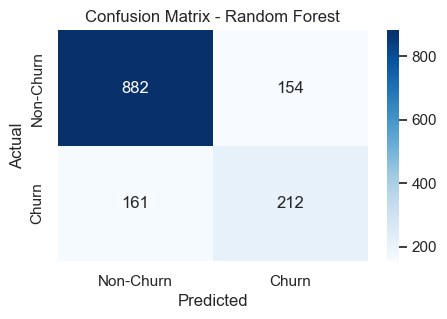

In [1451]:
# Plot the confusion matrix using seaborn
cm = confusion_matrix(y_test, y_pred_rfc)
plt.figure(figsize=(5, 3))
sns.heatmap(cm,annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Churn", "Churn"], yticklabels=["Non-Churn", "Churn"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

 # Sampling 

# SMOTEENN (combination of Smote + ENN) sampling method

### since we have performed SMOTEENN (combination of Smote + ENN) sampling method and we can see our dataset is nearly balanced

In [1580]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [1582]:
smote=SMOTEENN()
x_smote,y_smote=smote.fit_resample(x,y)

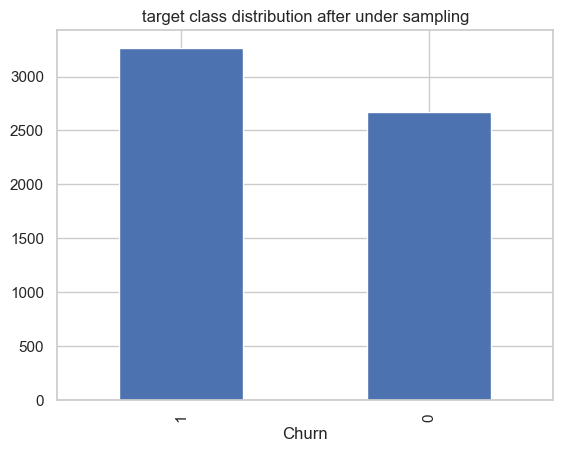

In [1583]:
y_smote.value_counts().plot(kind="bar")
plt.title("target class distribution after under sampling")
plt.show()

In [1586]:
y_smote.value_counts()

Churn
1    3268
0    2673
Name: count, dtype: int64

In [1588]:
#now split training and validation set using balanced dataset
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=42)

In [1590]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((4752, 19), (4752,), (1189, 19), (1189,))

# Logistic Regression

In [1468]:
lr = LogisticRegression(class_weight='balanced', random_state=42)

In [1470]:
lr.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [1472]:
# evaluate on test data
y_pred_log = lr.predict(x_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred_log))
print('\n')
print("Confsuion Matrix: \n", confusion_matrix(y_test, y_pred_log))
print('\n')
print("Classification Report:\n \n", classification_report(y_test, y_pred_log))

Accuracy Score: 0.9201359388275276


Confsuion Matrix: 
 [[485  49]
 [ 45 598]]


Classification Report:
 
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       534
           1       0.92      0.93      0.93       643

    accuracy                           0.92      1177
   macro avg       0.92      0.92      0.92      1177
weighted avg       0.92      0.92      0.92      1177



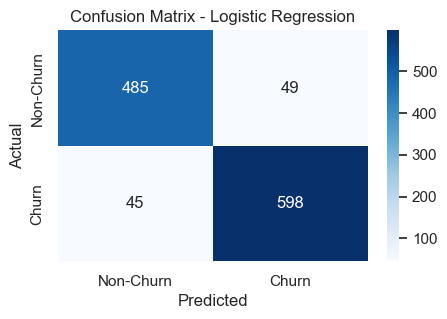

In [1474]:
# Plot the confusion matrix using seaborn
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(5, 3))
sns.heatmap(cm,annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Churn", "Churn"], yticklabels=["Non-Churn", "Churn"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [1476]:
from sklearn.metrics import roc_auc_score

# Get predicted probabilities for the positive class (churn)
y_prob_lr = lr.predict_proba(x_test)[:, 1]  

# Compute AUC-ROC score
auc_score = roc_auc_score(y_test, y_prob_lr)

# Print the score
print(f"AUC-ROC Score: {auc_score:.4f}")


AUC-ROC Score: 0.9756


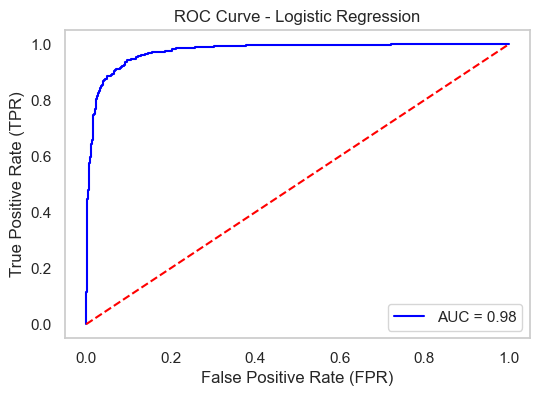

AUC-ROC Score: 0.9756


In [1478]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (churn)
y_prob_lr = lr.predict_proba(x_test)[:, 1]  

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_prob_lr)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal reference line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid()
plt.show()

# Print AUC Score
print(f"AUC-ROC Score: {auc_score:.4f}")

# SVM

In [1221]:

# Train the SVM model with default hyperparameters
svm_model = SVC(random_state=42, probability=True)

In [1223]:
# Fit the model
svm_model.fit(x_train, y_train)

SVC(probability=True, random_state=42)

In [1227]:
# Predict on the test set
y_pred_svm = svm_model.predict(x_test)

In [1229]:
# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred_svm))
print('\n')
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print('\n')
print("SVM ROC-AUC:", roc_auc_score(y_test, svm_model.predict_proba(x_test)[:, 1]))
print('\n')
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Accuracy Score: 0.7977332170880558


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       549
           1       0.81      0.79      0.80       598

    accuracy                           0.80      1147
   macro avg       0.80      0.80      0.80      1147
weighted avg       0.80      0.80      0.80      1147



SVM ROC-AUC: 0.8852398096874219


SVM Confusion Matrix:
 [[441 108]
 [124 474]]


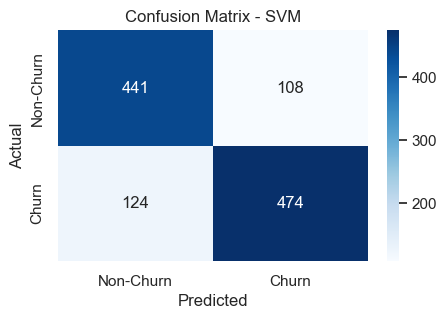

In [1231]:
# Plot the confusion matrix using seaborn
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(5, 3))
sns.heatmap(cm,annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Churn", "Churn"], yticklabels=["Non-Churn", "Churn"])
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

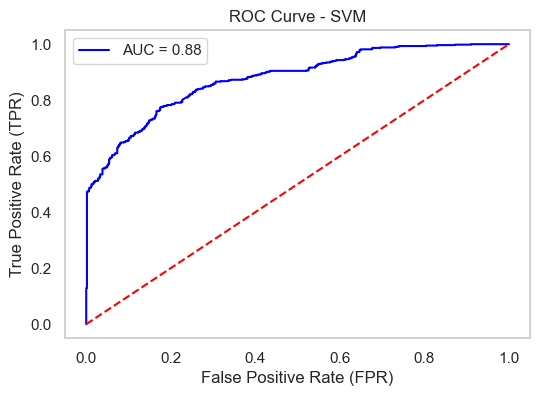

AUC-ROC Score: 0.8766


In [625]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (churn)
y_prob_lr = svm_model.predict_proba(x_test)[:, 1]  

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_prob_lr)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal reference line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - SVM")
plt.legend()
plt.grid()
plt.show()

# Print AUC Score
print(f"AUC-ROC Score: {auc_score:.4f}")

# XGBoost

In [1558]:
xg = xgb.XGBClassifier(random_state=42)

In [1560]:
xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [1562]:
# evaluate on test data
y_pred_xg = xg.predict(x_test)

In [1564]:
print("Accuracy Score:", accuracy_score(y_test, y_pred_xg))
print('\n')
print("XGBoost Confsuion Matrix: \n", confusion_matrix(y_test, y_pred_xg))
print('\n')
print("Classification Report:\n \n", classification_report(y_test, y_pred_xg))


Accuracy Score: 0.94843617920541


XGBoost Confsuion Matrix: 
 [[519  40]
 [ 21 603]]


Classification Report:
 
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       559
           1       0.94      0.97      0.95       624

    accuracy                           0.95      1183
   macro avg       0.95      0.95      0.95      1183
weighted avg       0.95      0.95      0.95      1183



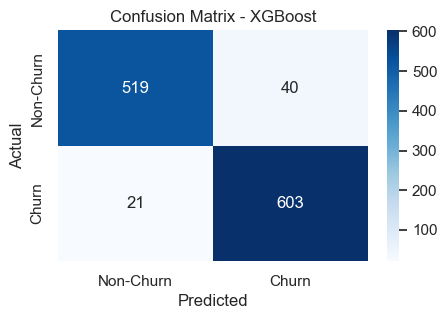

In [1566]:
# Plot the confusion matrix using seaborn
cm = confusion_matrix(y_test, y_pred_xg)
plt.figure(figsize=(5, 3))
sns.heatmap(cm,annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Churn", "Churn"], yticklabels=["Non-Churn", "Churn"])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

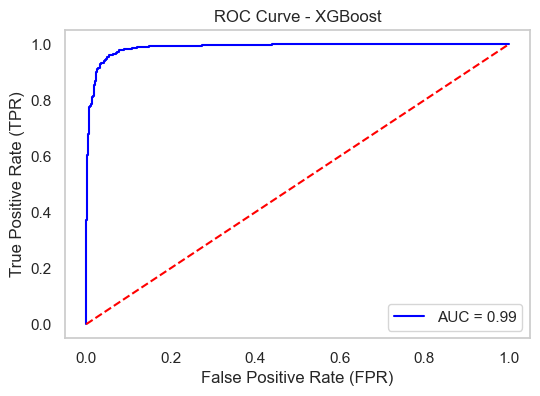

AUC-ROC Score: 0.9892


''

In [1568]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (churn)
y_prob_lr = xg.predict_proba(x_test)[:, 1]  

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_prob_lr)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal reference line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.grid()
plt.show()

# Print AUC Score
print(f"AUC-ROC Score: {auc_score:.4f}")
""

# Random Forest

In [1592]:
rfc_m = RandomForestClassifier(random_state=42)

In [1594]:
rfc_m.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [1596]:
# evaluate on test data
y_pred_rf= rfc_m.predict(x_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print('\n')
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_rf))
print('\n')
print("Classification Report:\n \n", classification_report(y_test, y_pred_rf))

Accuracy Score: 0.9621530698065601


Confusion Matrix: 
 [[527  25]
 [ 20 617]]


Classification Report:
 
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       552
           1       0.96      0.97      0.96       637

    accuracy                           0.96      1189
   macro avg       0.96      0.96      0.96      1189
weighted avg       0.96      0.96      0.96      1189



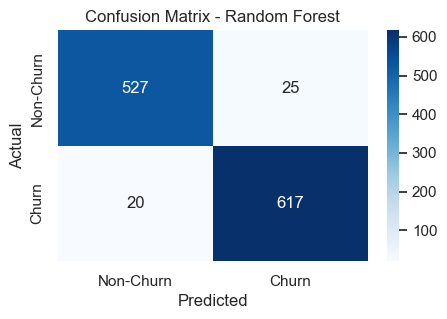

In [1598]:
# Plot the confusion matrix using seaborn
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 3))
sns.heatmap(cm,annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Churn", "Churn"], yticklabels=["Non-Churn", "Churn"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

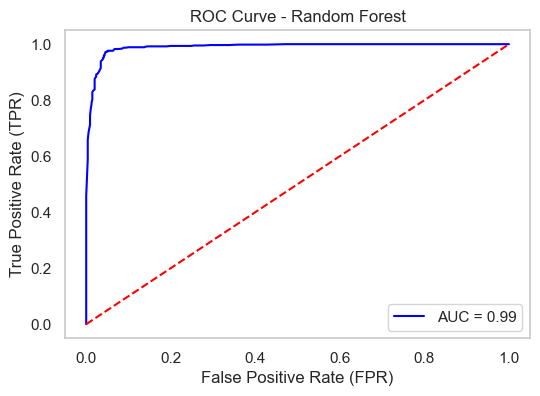

AUC-ROC Score: 0.9897


In [1600]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (churn)
y_prob_lr = rfc_m.predict_proba(x_test)[:, 1]  

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_prob_lr)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal reference line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid()
plt.show()

# Print AUC Score
print(f"AUC-ROC Score: {auc_score:.4f}")

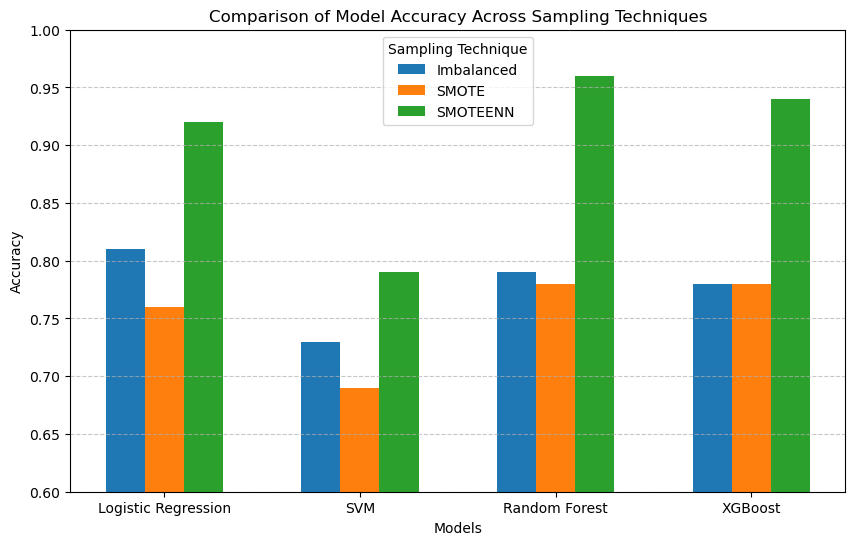

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define model names and accuracy values
models = ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost']
sampling_techniques = ['Imbalanced', 'SMOTE', 'SMOTEENN']

accuracy_values = {
    'Logistic Regression': [0.81, 0.76, 0.92],
    'SVM': [0.73, 0.69, 0.79],
    'Random Forest': [0.79, 0.78, 0.96],
    'XGBoost': [0.78, 0.78, 0.94]
}

# Set up bar positions
x = np.arange(len(models))
width = 0.2  # Width of bars

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each sampling technique
for i, technique in enumerate(sampling_techniques):
    values = [accuracy_values[model][i] for model in models]
    ax.bar(x + i * width, values, width, label=technique)

# Formatting the plot
ax.set_xlabel("Models")
ax.set_ylabel("Accuracy")
ax.set_title("Comparison of Model Accuracy Across Sampling Techniques")
ax.set_xticks(x + width)
ax.set_xticklabels(models)
ax.legend(title="Sampling Technique")

# Show the plot
plt.ylim(0.6, 1)  # Set y-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [1176]:
# save the trained model as a pickle file
model_data = {"model": rfc_m , "features_names": x.columns.tolist()}


with open("customer_churn_model_1.pkl", "wb") as f:
  pickle.dump(model_data, f)

In [1178]:
# load teh saved model and the feature names

with open("customer_churn_model_1.pkl", "rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

In [1180]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [1182]:
print(feature_names)

['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']


# Customer Churn Prediction

In [1186]:
# Churn data  	

#Top 10 high correlated features
select_feature.get_feature_names_out()

array(['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges'], dtype=object)

In [181]:
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [183]:
# Load dataset
df = pd.read_csv("customerchurn.csv")  # Replace with actual dataset

In [185]:

# Encode categorical features
encoders = {}
for feature in df.select_dtypes(include='object').columns:
    encoder = LabelEncoder()
    df[feature] = encoder.fit_transform(df[feature])
    encoders[feature] = encoder  # Save the encoder

In [187]:

# Save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)




In [354]:

# Define features and target
x = x[select_feature.get_feature_names_out()] # Replace 'Churn' with actual target column
y = df['Churn']

In [356]:
x.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,TotalCharges
0,0,1,0,2,0,0,0,1,29.85,29.85
1,0,34,2,0,2,0,1,0,56.95,1889.50
2,0,2,2,2,0,0,0,1,53.85,108.15
3,0,45,2,0,2,2,1,0,42.30,1840.75
4,0,2,0,0,0,0,0,1,70.70,151.65


In [358]:

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [360]:

# Train Random Forest model
rfc_m = RandomForestClassifier(random_state=42)
rfc_m.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [383]:
# Save the model
model_data = {"model": rfc_m, "feature_names": x.columns.tolist()}
with open("Customer_churn_model_RF.pkl", "wb") as f:
    pickle.dump(model_data, f)

print("Model and encoders saved successfully!")

Model and encoders saved successfully!


In [1189]:
import pickle
import pandas as pd
import numpy as np

# Load the trained model
with open("Customer_churn_model_RF.pkl", "rb") as f:
    model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["feature_names"]

# Load the encoders
with open("encoders.pkl", "rb") as f:
    encoders = pickle.load(f)

### No churn

In [1194]:
# Example New Customer Input Data
input_data = {
    "Dependents": "No",
    "tenure":13,
    "OnlineSecurity": "Yes",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "Yes",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "MonthlyCharges": 76.2,
    "TotalCharges": 981.45
}

In [1196]:


# Convert input_data into a DataFrame
input_data_df = pd.DataFrame([input_data])

# Encode categorical features using the saved encoders
for column, encoder in encoders.items():
    if column in input_data_df.columns:
        input_data_df[column] = input_data_df[column].apply(
            lambda x: encoder.transform([x])[0] if x in encoder.classes_ else -1
        )  # Assign -1 to unseen categories

# Ensure feature alignment with training data
for col in feature_names:
    if col not in input_data_df.columns:
        input_data_df[col] = 0  # Add missing features with default value

# Reorder columns to match training data
input_data_df = input_data_df[feature_names]

# Make Prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)[:, 1]  # Probability of churn

# Display results
print(f"Prediction: {'Churn [1]' if prediction[0] == 1 else 'No Churn [0]'}")
print(f"Prediction Probability: {pred_prob[0]:.4f}")


Prediction: No Churn [0]
Prediction Probability: 0.4186


### Churn

In [1199]:

# Example New Customer Input Data
input_data = {
    "Dependents": "No",
    "tenure": 2,
    "OnlineSecurity": "Yes",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "MonthlyCharges": 53.85,
    "TotalCharges": 108.15
}

In [1201]:

# Convert input_data into a DataFrame
input_data_df = pd.DataFrame([input_data])

# Encode categorical features using saved encoders
for column, encoder in encoders.items():
    if column in input_data_df.columns:
        input_data_df[column] = input_data_df[column].apply(
            lambda x: encoder.transform([x])[0] if x in encoder.classes_ else -1
        )  # Assign -1 for unseen categories

# Ensure all expected features are present
for col in feature_names:
    if col not in input_data_df.columns:
        input_data_df[col] = 0  # Fill missing features with 0

# Reorder columns to match training data
input_data_df = input_data_df[feature_names]

# Convert to numeric type (avoid string issues)
input_data_df = input_data_df.astype(float)

# Make Prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)[:, 1]  # Probability of churn

# Display results
print(f"Prediction: {'Churn [1]' if prediction[0] == 1 else 'No Churn [0]'}")
print(f"Prediction Probability: {pred_prob[0]:.4f}")


Prediction: Churn [1]
Prediction Probability: 0.5600
